# Predicting Bike Sharing Demand Using Various Machine Learning Model
## Predict how atmospheric conditions affect the number of bikes rented, analysis of bike rents and correlation with weather condition. applying various machine learning model to better predict the target variable.

In [43]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="https://statik.tempo.co/data/2020/07/04/id_950086/950086_720.jpg", width=500, height=500)

## **Pendahuluan**
notebook ini (akan) terbagi ke dalam 4 sub bab :
1. Data preprocessing dan feature engineering
2. EDA
3. Data Visualization
4. Model ML - dataset dibagi ke dalam df_train dan df_test

## About Dataset

#### **Overview**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world. Indonesia, in particular, has several companies engaged in this field, for example, Gowes which operates on my campus(Universitas Indonesia).

#### **Data Fields**
- Date : year-month-day -> dapat melakukan feature engineering pada kolom ini
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of the day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

apa itu dew temperature?
Dew Point Temperature adalah titik embun udara atau titik saturasi artinya suhu di mana udara mulai mengembun menimbulkan titik-titik air. Dew Point -20 degC artinya udara hanya akan mengembun menjadi air ketika suhu turun menjadi -20degC.
###
Ini adalah rasio antara apa yang ada di udara dan berapa banyak yang bisa dipegang, dinyatakan sebagai persentase. Anda dapat menggunakan suhu titik embun untuk membantu menentukan seberapa lembap udara. Suhu titik embun yang mendekati suhu sebenarnya berarti bahwa udara cukup penuh dengan uap air dan dengan demikian sangat lembap. Jika titik embun secara signifikan lebih rendah dari suhu udara, udara menjadi kering dan masih bisa menampung banyak uap air tambahan.

Umumnya, titik embun pada atau di bawah 55 adalah nyaman tetapi lebih dari 65 terasa menindas. Ketika Anda memiliki suhu tinggi dan tingkat kelembaban tinggi atau titik embun, Anda memiliki indeks panas yang lebih tinggi juga. Misalnya, mungkin hanya 90 derajat Fahrenheit, tetapi sebenarnya terasa seperti 96 karena kelembaban yang tinggi.
  
  **terdapat 14 kolom** 

# Deskripsi Masalah

Penyewaan sepeda adalah salah satu solusi bagi masalah transportasi kota. selain menyehatkan, bersepeda juga turut berkontribusi pada kesehatan lingkungan karena merupakan moda transportasi yang menyumbang nol-emisi (zero-emission). Sistem penyewaan sepeda yang jamak digunakan adalah menyediakan shelter pada lokasi-lokasi tertentu sebagai tempat berangkat dan perhentian pengguna. secara umum, terdapat 2 skema penyewaan sepeda. skema pertama adalah sistem bike sharing publik yang tidak meanrik biaya dan sistem kedua adalah sistem subscription dimana akan dikenai biaya membership. mengutip wikipedia :
"A bicycle-sharing system, bike share program,[1] public bicycle scheme,[2] or public bike share (PBS) scheme,[3] is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a price or free."
sistem bike sharing sangat bisa menggunakan data sains sebagai tools bisnisnya karena kaya akan data. misalnya saja data pengguna yang seperti gender, usia, dll, data shelter seperti longitude dan latitude -tidak digunakan pada dataset ini-, data yang berkaitan dengan waktu seperti waktu keberangkatan dan perhentian, dan juga data yang berkaitan dengan cuaca seperti yang banyak digunakan pada dataset ini. penggunaan data sains umumnya dan machine learning khususnya juga dapat membantu penyelesaian masalah seperti jumlah sepeda yang harus tersedia pada tiap shelter, waktu2 kapan saja yang cenderung memiliki demand tinggi, dsb.


menurut paper, tujuan menggunakan data science adalah untuk mencari algoritma terbaik yang memprediksi demand penyewaan sepeda dengan skema bike-sharing per jam. algoritma terbaik kemudian akan dilatih dengan berbagai kombinasi fitur untuk menilai fitur mana yang paling berpengaruh dan mengetahui hubungan antar fitur.

paper tsb menggunakan model : (a) LM, (b) GBM, (c) SVM, (d) BT and (e) XGBTree untuk memprediksi permintaan terhadap penyewaan sepeda publik kemudian meranking pengaruh dari prediktor dan parameter yang ada dalam model.

datanya cukup bersih, tidak ada missing value dan duplikat. tapi ada feature engineering berupa penambahan kolom waktu. kolom yang menunjukkan musim juga dibuat, begitu juga kolom yg menunjukkan apakah rental sepeda buka/tutup pada hari tsb.

# Importing Libraries

In [44]:
import pylab
import calendar
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import xgboost as xgb
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

#### **Lets Read In The Dataset**

In [45]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\FinPro Dibimbing\SeoulBikeData.csv", encoding= 'unicode_escape')
#Importing the dataset

In [46]:
# mengganti nama kolom (agar mempermudah)
df.rename(columns={'Rented Bike Count': 'Count',
                  'Temperature(°C)': 'Temp',
                   'Humidity(%)': 'Humidity',
                  'Visibility (10m)': 'Visibility',
                  'Dew point temperature(°C)': 'DewTemp',
                  'Wind speed (m/s)' : 'WindSpeed',
                  'Solar Radiation (MJ/m2)': 'SolarRad',
                  'Rainfall(mm)': 'Rainfall',
                  'Snowfall (cm)':'Snowfall',
                   },
          inplace=True, errors='raise')
###
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
target = 'Count'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mKesimpulan:\033[0m Dataset terdiri atas {} features & {} samples.'.format(df.shape[1], df.shape[0]))


Kesimpulan: Dataset terdiri atas 14 features & 8760 samples.


In [48]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mKesimpulan:\033[0m Dataset terdiri atas {} kolom numerical & {} kolom kategori.'.format(len(nf),len(cf)))


Kesimpulan: Dataset terdiri atas 10 kolom numerical & 3 kolom kategori.


In [49]:
#Checking the stats of all the columns

display(df.describe())

,Count,Hour,Temp,Humidity,WindSpeed,Visibility,DewTemp,SolarRad,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


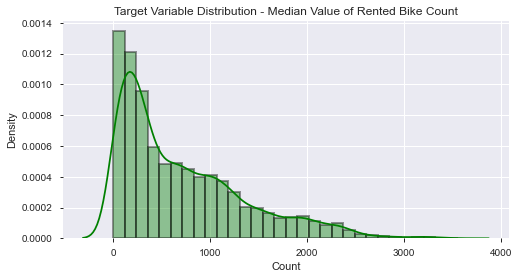

In [50]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Rented Bike Count')
plt.show()

tidak normally distributed

In [9]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                 Total Null Values  Percentage
Date                             0         0.0
Count                            0         0.0
Hour                             0         0.0
Temp                             0         0.0
Humidity                         0         0.0
WindSpeed                        0         0.0
Visibility                       0         0.0
DewTemp                          0         0.0
SolarRad                         0         0.0
Rainfall                         0         0.0
Snowfall                         0         0.0
Seasons                          0         0.0
Holiday                          0         0.0
Functioning Day                  0         0.0


In [10]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

In [ ]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [ ]:
df1.shape

#### **Shape Of The Dataset**

In [ ]:
list(df1)

In [ ]:
# BEFORE
original_df.apply(lambda x: len(x.unique()))

In [ ]:
df1.columns
# nama kolom harus diubah agar mempermudah

In [ ]:
# unique values
df1.apply(lambda x: len(x.unique()))

In [ ]:
df.shape

# Tipe-tipe Variabel:

- Categorical - Seasons, Holiday, Functioning Day -> akan bertambah: Day, Month, Year, weekday, day of week
- Timeseries - Date
- Numerical - the rest of columns

In [ ]:
# The record dates are weird. Dates are unsorted
# ubah dulu tipe kolom menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.plot(y='Date')


In [ ]:
# membuat kolom hh:00:00 dari kolom hour 
hour_str = [str(hour)+':00:00' if hour>9 else '0'+str(hour)+':00:00' for hour in df['Hour']]

# Add hh:00:00 after date columns
df['Date'] = [str(date)[:10]+' '+hour for date, hour in zip(df['Date'].values, hour_str)]

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

In [ ]:
# Sort dates
df = df.sort_values(by=['Date']).reset_index(drop=True)

df.plot(y='Date')

sekarang terlihat lebih beraturan

In [ ]:
# Bike count is recorded on 12 every month from Jan to Dec 2017
df['Date'].dt.date.unique()[:12]

In [ ]:
# From 12 Dec onwards, bike count is recorded everyday
df['Date'].dt.date.unique()[12:24]

In [ ]:
df.plot(x='Date', y='Count', figsize=(15,4))

In [ ]:
# Resample data weekly 
df_w = df.resample('W', on='Date').mean().dropna()

plt.figure(figsize=(15,4))
plt.plot(df_w.index, df_w.Count)

## Feature Engineering
### perlu dilakukan untuk mengekstrak kolom waktu dari kolom 'Date'

In [ ]:
# mengubah tipe kolom 'date'
df['Date'] = pd.to_datetime(df['Date'])
# membagi-bagi data waktu ke dalam tahun, bulan, dan hari
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

# Change holiday/no holiday to yes/no
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}

df = df.replace(label)


# drop kolom date agar tidak redundant
# df.drop('Date', axis = 1, inplace = True) 

In [ ]:
#Convert string to datatime and create Hour, Month and Day of week
#df['Date'] = pd.to_datetime(df['Date'])
#df['Hour'] = df['Date'].apply(lambda x:x.hour)
#df['Month'] = df['Date'].apply(lambda x:x.month)
#df['Day of Week'] = df['Date'].apply(lambda x:x.dayofweek)

In [ ]:
### add interpreted features
#df['Date']=pd.to_datetime(df['Date'])
#df['Year']=df['Date'].dt.year
#df['Month']=df['Date'].dt.month
#df['Day']=df['Date'].dt.day
#Convert string to datatime and create Hour, Month and Day of week
#df['Hour'] = df['Date'].apply(lambda x:x.hour)
#df['WeekDay']=df['Date'].dt.day_name()
#mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
#df['Day of Week']=df['WeekDay'].map(mapping_dictDay)
### mappingnya diakhir aja
#df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
#df['Holiday']=df['Holiday'].map({'Yes':1,'No':0})
###
## no rentals on a non functioning day, since it is not open for rentals. Ignore these entries
#df=df[df['Functioning Day']!=0]

In [ ]:
df.sample(5)

#### **Menggunakan Package Panda Profiling untuk melihat ringkasan nilai setiap kolom/feature**

In [ ]:
pp.ProfileReport(df)
#msno.matrix(df,figsize=(12,5))

## **Mengecek missing value, duplicate, dan irrelevant entries**

In [ ]:
msno.matrix(df,figsize=(12,5))

In [ ]:
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
# df.shape, jika sama berarti tidak ada duplikat

#Create a copy of the  dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.

df_dummy=df.iloc[:,1:16]
for col in df_dummy:
    print(df_dummy[col].value_counts(ascending=False), '\n\n\n')

In [ ]:
df_dup.shape

In [ ]:
df.shape
## karena hasilnya sama, berarti tidak da duplikat value

# Data Visualization

In [ ]:
#Histogram for count
sns.set_style('whitegrid')
sns.displot(df['Count'], bins = 100, color = 'blue')
plt.show()

In [ ]:
#Q-Q Plot
from scipy import stats
plt = stats.probplot(df['Count'], plot=sns.mpl.pyplot)

In [ ]:
#Boxplot for count
import matplotlib.pyplot as plt
sns.boxplot(x = 'Count', data = df, color = 'lightgreen')
plt.show()

In [ ]:
#Calculating the number of outliers
Q1 = df['Count'].quantile(0.25)
Q3 = df['Count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Count'] < (Q1 - 1.5 * IQR)) | (df['Count'] > (Q3 + 1.5 * IQR))]
print((len(outliers)/len(df))*100)

1.8% of the target values are above Q3 + 1.5IQR

In [ ]:
#Data without the outliers in count
df = df[~df.isin(outliers)]


## Coercing into categorical variable


In [ ]:
#list_var_kategori = ["Seasons","Holiday","Functioning_Day","Day","Month","Year"]
#for var in list_var_kategori:
#    df[var] = df[var].astype("category")

In [ ]:
# Convert to 'category' data type/coercing into categorical variable

#df['Season']=df['Seasons'].astype('category')
#df['Holiday']=df['Holiday'].astype('category')
#df['Functioning_Day']=df['Functioning_Day'].astype('category')
#df['Day']=df['Day'].astype('category')
#df['Month']=df['Month'].astype('category')
d#f['Year']=df['Year'].astype('category')

In [ ]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

#df_new = pd.get_dummies(df, drop_first=True)
#df_new.info()


- Verify the info and shape of the dataframes after split:

In [ ]:
# Create a new dataframe of only numeric variables:

df_num=df[[ 'Temp', 'Humidity','WindSpeed', 'Visibility', 'DewTemp','SolarRad','Rainfall','Snowfall','Count']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [ ]:
#Build boxplot of all categorical variables (before creating dummies) againt the target variable 'Count' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Seasons', y = 'Count', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Month', y = 'Count', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Functioning_Day', y = 'Count', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Holiday', y = 'Count', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Day', y = 'Count', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'Year', y = 'Count', data = df)
plt.show()

# Correlation Matrix

In [ ]:
corrMatt = df[['Temp', 'Humidity','WindSpeed', 'Visibility', 'DewTemp','SolarRad','Rainfall','Snowfall','Count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

###
plt.style.use('seaborn-white')

df_cluster2 = df.corr()
plot_kws={"s": 1}
sns.clustermap(df_cluster2,
            cmap='RdYlBu',
            linewidths=0.1,
            figsize=(15,15),
               annot=True,
            linecolor='white')

In [ ]:
# lebih bagus heatmap correlation-nya
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatt[['Count']].sort_values(by='Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16)

# Univariate/ Bivariate Analysis

In [ ]:
plt.title("Hours")
df['Hour'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['Year'].value_counts()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4)
fig.set_size_inches(18,25)

sns.regplot(data = df, x = "Hour", y = "Count", ax = ax1)
sns.regplot(data = df, x = "Temp", y = "Count",  ax = ax2)
sns.regplot(data = df, x = "WindSpeed", y = "Count",  ax = ax3)
sns.regplot(data = df, x = "Humidity", y = "Count",   ax = ax4)

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'Month', y = 'Count', data = df, estimator = np.average, hue = 'Seasons', palette = 'coolwarm')
plt.ylabel('Rata-rata penyewaan sepeda per musim')
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (17,7), sharey = True)
sns.pointplot(x = 'Hour', y = 'Count', data = df, estimator = np.average, hue = 'Functioning_Day', ax = axes[0], palette = 'muted')
sns.pointplot(x = 'Hour', y = 'Count', data = df, estimator = np.average, hue = 'Holiday', ax = axes[1], palette = 'muted')
ax = [0,1]
for i in ax:
    axes[i].set(ylabel='Average Count')

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'Hour', y = 'Count', data = df, estimator=np.average, hue = 'WeekDay', palette='coolwarm')

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'Hour', y = 'Count', data = df, estimator=np.average, hue = 'Month', palette='coolwarm')

# Analysis of bike rents and correlation with weather conditions

The highest number of bike rents occur in summer while the least bike rents occur in winter. From day to day basis, the trend of bike rents is almost similar with slight peaking demands on Thursday while drops on Sunday. In monthly basis, there are two peaks occur in June and October. In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00). There are two peak occurences, at 7.00 and at 17.00, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon.

Jumlah sewa sepeda tertinggi terjadi di musim panas sedangkan sewa sepeda paling sedikit terjadi di musim dingin. Dari hari ke hari, tren sewa sepeda hampir sama dengan permintaan yang sedikit memuncak pada hari Kamis dan turun pada hari Minggu. Secara bulanan, ada dua puncak yang terjadi pada bulan Juni dan Oktober. Dalam hitungan jam, sepeda menghitung puncak di sore hari (dari 15.00 hingga 20.00). Terdapat dua kejadian puncak, yaitu pada pukul 07.00 dan pukul 17.00 yang kemungkinan besar disebabkan oleh pekerja yang berangkat ke kantor pada pagi hari dan pulang pada sore hari.


berikut pembagian musim di kota Seoul:
* Spring (pertengahan Maret sampai akhir Mei)
* Summer (Juni sampai Agustus)
* Autumn (September sampai Novemberr)
* Winter (Desember sampai pertengahan Maret)

In [ ]:
x = [['Seasons', 'Day'], ['Month', 'Hour']]
title = [['Seasonal Bike Rents', 'Daily Bike Rents'], 
         ['Monthly Bike Rents', 'Hourly Bike Rents']]

f, ax = plt.subplots(2,2,figsize=(10,6))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='Count', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='Count', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='Count', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity. The bike counts peak in the afternoon (from 15.00 to 20.00) where temperature is the highest, with the most visibility, windspeed, and least humidity. 

In [ ]:
y = [['Count', 'Temp'], ['Visibility', 'WindSpeed'], ['SolarRad', 'Humidity']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Hour', y=y[i][j], ax=ax[i][j], color='y')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()

The monthly movement of bike counts seems only to correlate with temperature. The movement of snowfall correlates with season i.e. high snowfall from January to March during winter season. However, there is a bizarre drop of rainfall in July. It seems there is no rain during the occassionally rainy season in July. 

In [ ]:
y = [['Count', 'Temp'], ['Visibility', 'WindSpeed'], ['Snowfall', 'Rainfall']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Snowfall [cm]', 'Rainfall [mm]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Month', y=y[i][j], ax=ax[i][j], color='green')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()        

The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity. The highest count of rented bikes occurs in summer, while the least occurs in winter.

In [ ]:
y = [['Count', 'Temp'], ['Rainfall', 'Snowfall'], ['SolarRad', 'Humidity']]
title = [['Bike Counts', 'Temperature [°C]'], ['Rainfall [mm]', 'Snowfall [cm]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(9,9))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='Seasons', y=y[i][j], ax=ax[i][j], palette='RdBu')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()        

# When does bike rents sharing facility not function?

* In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is a work day but not functioning
* In spring, there are 48 records when that day is work day but not functioning

In conclusion, the bike rents do not function on some days in autumn and spring.

In [ ]:
pd.pivot_table(df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

# Is there a day when the bike share is temporarily down or not functioning?

In [ ]:
dates = df[(df.Holiday=='No') & (df.Functioning Day=='No')].Date.dt.date.unique()

dates

In [ ]:
df.sample()

In [ ]:
df['Functioning_Day'].nunique()

It was found that on 10 June 2018, the bike share facility did not function temporarily from 00.00 midnight to 10.00 in the morning.

In [ ]:
# Special occasion when the bike share not functioning temporarily
print(dates[3])

df[df.Date.dt.date==dates[3]].plot(x='Date', y='Count')

Surprisingly on holidays, the bike share facility is working. The listed dates when holiday below are in fact public holidays in Korea, for example Korean New Year on 15-17 February 2018, Buddha's birthday on 22 March 2018, and Chuseok on 23-25 September. Except on 10 March 2018, when it was the same date of South Korea and North Korea presidential meeting with US President Donald Trump.

In [ ]:
# On public holidays it keeps operating
df[(df.Holiday=="Yes") & (df.Functioning Day=="Yes")].Date.dt.date.unique()

In [ ]:
#Histogram for Windspeed
sns.set_style('whitegrid')
sns.distplot(df['WindSpeed'], bins = 100, color = 'blue') #Windspeed cannot be 0.
plt.show()

In [ ]:
#Replacing 0s in windspeed with the mean value grouped by season
#df['WindSpeed'] = df['WindSpeed'].replace(0, np.nan)
#df['WindSpeed'] = df['WindSpeed'].fillna(df.groupby('SolarRad')['Seasons'].transform('mean'))
#sns.distplot(df['WindSpeed'], bins = 100, color = 'red')
#plt.show()

In [ ]:
sns.jointplot(x = 'Temp', y = 'Count', data = df, kind = 'kde', cmap = 'plasma')
plt.show()

In [ ]:
#list_var_kategori = ["Seasons","Holiday","Functioning Day","Day","Month","Year"]
#for var in list_var_kategori:
#    df[var] = df[var].astype("category")

# DARI SINI MASALAHNYA KAK :)
## Melakukan encoding

In [51]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['WeekDay']=df['Date'].dt.day_name()

In [52]:
df = pd.get_dummies(df, columns = ['Seasons','Holiday','Functioning Day','Month','Year','WeekDay'],drop_first=True)
#df = pd.get_dummies(df, columns = ['Month','Year'], prefix=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   Count                8760 non-null   int64         
 2   Hour                 8760 non-null   int64         
 3   Temp                 8760 non-null   float64       
 4   Humidity             8760 non-null   int64         
 5   WindSpeed            8760 non-null   float64       
 6   Visibility           8760 non-null   int64         
 7   DewTemp              8760 non-null   float64       
 8   SolarRad             8760 non-null   float64       
 9   Rainfall             8760 non-null   float64       
 10  Snowfall             8760 non-null   float64       
 11  Day                  8760 non-null   int64         
 12  Seasons_Spring       8760 non-null   uint8         
 13  Seasons_Summer       8760 non-nul

In [ ]:
# Convert to 'category' data type/coercing into categorical variable

#df['Seasons']=df['Seasons'].astype('category')
#df['Holiday']=df['Holiday'].astype('category')
#df['Functioning Day']=df['Functioning Day'].astype('category')
#df['Day']=df['Day'].astype('category')
#df['Month']=df['Month'].astype('category')
#df['Year']=df['Year'].astype('category')
#df['WeekDay']=df['WeekDay'].astype('category')

#Converting the Date column in Datetime Dtype
#df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
#df['Day']=df['Date'].dt.day
#df['Month']=df['Date'].dt.month
#df['Year']=df['Date'].dt.year
#df['WeekDay']=df['Date'].dt.day_name()

In [54]:
# karena sudah diekstrak, kolom Date bisa dihapus
df.drop('Date',axis = 1, inplace = True) 

In [ ]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

#df_new = pd.get_dummies(df, drop_first=True)
#df_new.info()

In [ ]:
#df_new.head()
# ada 36 kolom

As the target variable is a highly skewed data, we will try to transform this data using either log, square-root or box-cox transformation. After trying out all three, log square gives the best result. Also as the evaluation metric is RMSLE, using log would help as it would allow to less penalize the large difference in final variable values.

In [55]:
df.drop('Day', axis = 1, inplace = True) 

## Step 5: Splitting the Data into Training and Testing Sets

In [56]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [57]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [58]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['Temp', 'Humidity','WindSpeed', 'Visibility', 'DewTemp','SolarRad','Rainfall','Snowfall','Count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

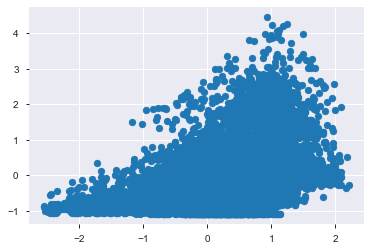

In [21]:
plt.scatter('Temp','Count',data=df_train)

### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('Count')
X_train = df_train

In [61]:
X_train.drop('Hour',axis=1,inplace=True)
X_train.head()

,Temp,Humidity,WindSpeed,Visibility,DewTemp,SolarRad,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,...,Month_10,Month_11,Month_12,Year_2018,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
5584,2.000319,-1.378583,1.036599,0.523850,0.937071,2.099460,-0.126892,-0.171549,0,1,...,0,0,0,1,0,1,0,0,0,0
5308,0.643583,1.911145,-1.192842,0.908334,1.227893,-0.654804,-0.126892,-0.171549,0,1,...,1,0,0,1,0,0,1,0,0,0
5446,1.221452,0.929137,-0.805113,0.560153,1.449836,-0.654804,-0.126892,-0.171549,0,1,...,0,0,0,1,0,0,1,0,0,0
7554,-0.068284,-0.887579,0.648871,0.685564,-0.394589,-0.449092,-0.126892,-0.171549,0,0,...,0,1,0,1,0,1,0,0,0,0
3290,-0.378156,-0.642077,-0.805113,0.905033,-0.524693,-0.654804,-0.126892,-0.171549,1,0,...,0,0,0,1,0,0,0,0,1,0


## Step 6: Building a linear model

### Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# menghapus NaN value pada X_train
#X_train = X_train.dropna( how='any',
                    #subset=None)
X_train = X_train.fillna(lambda x: x.median())

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 5584 to 5640
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 6132 non-null   int64  
 1   Temp                 6132 non-null   float64
 2   Humidity             6132 non-null   float64
 3   WindSpeed            6132 non-null   float64
 4   Visibility           6132 non-null   float64
 5   DewTemp              6132 non-null   float64
 6   SolarRad             6132 non-null   float64
 7   Rainfall             6132 non-null   float64
 8   Snowfall             6132 non-null   float64
 9   Seasons_Spring       6132 non-null   uint8  
 10  Seasons_Summer       6132 non-null   uint8  
 11  Seasons_Winter       6132 non-null   uint8  
 12  Holiday_No Holiday   6132 non-null   uint8  
 13  Functioning Day_Yes  6132 non-null   uint8  
 14  Month_2              6132 non-null   uint8  
 15  Month_3              6132 non-null 

In [ ]:
# mengubah tipe kolom dari float menjadi integer
## ga usah karena kan udh di transform
#cols = ['Day', 'Month','Year','Hour','Humidity','Visibility']
#X_train[cols] = X_train[cols].applymap(np.int64)

# SAMA DISINI

In [63]:
# Running RFE with the output number of the variable equal to 10/15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', False, 2),
 ('Visibility', False, 16),
 ('DewTemp', True, 1),
 ('SolarRad', True, 1),
 ('Rainfall', False, 3),
 ('Snowfall', False, 11),
 ('Seasons_Spring', True, 1),
 ('Seasons_Summer', True, 1),
 ('Seasons_Winter', True, 1),
 ('Holiday_No Holiday', True, 1),
 ('Functioning Day_Yes', True, 1),
 ('Month_2', True, 1),
 ('Month_3', False, 5),
 ('Month_4', False, 12),
 ('Month_5', True, 1),
 ('Month_6', True, 1),
 ('Month_7', False, 4),
 ('Month_8', False, 7),
 ('Month_9', False, 6),
 ('Month_10', True, 1),
 ('Month_11', False, 13),
 ('Month_12', False, 14),
 ('Year_2018', True, 1),
 ('WeekDay_Monday', False, 15),
 ('WeekDay_Saturday', False, 10),
 ('WeekDay_Sunday', True, 1),
 ('WeekDay_Thursday', False, 9),
 ('WeekDay_Tuesday', False, 8),
 ('WeekDay_Wednesday', False, 17)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['Temp', 'Humidity', 'DewTemp', 'SolarRad', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Month_2', 'Month_5', 'Month_6', 'Month_10',
       'Year_2018', 'WeekDay_Sunday'],
      dtype='object')

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     372.3
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        23:01:23   Log-Likelihood:                -6711.9
No. Observations:                6132   AIC:                         1.346e+04
Df Residuals:                    6116   BIC:                         1.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2978      0.077    -16.893      0.000      -1.448      -1.147
Temp                    0.4530      0.088      5.167      0.000       0.281       0.625
Humidity               -0.4800      0.040    -11.877      0.000      -0.559      -0.401
DewTemp                 0.2421      0.100      2.410      0.016       0.045       0.439
SolarRad               -0.1313      0.013    -10.426      0.000      -0.156      -0.107
Seasons_Spring         -0.1731      0.029     -6.022      0.000      -0.229      -0.117
Seasons_Summer         -0.4515      0.037    -12.344      0.000      -0.523      -0.380
Seasons_Winter         -0.3598      0.045     -8.030      0.000      -0.448      -0.272
Holiday_No Holiday      0.2120      0.044      4.800      0.000       0.125       0.299
Functioning Day_Yes     1.4873      0.055     27.249      0.000       1.380       1.594
Month_2                -0.1107      0.038     -2.943      0.003      -0.185      -0.037
Month_5                 0.1429      0.036      3.962      0.000       0.072       0.214
Month_6                 0.4509      0.036     12.477      0.000       0.380       0.522
Month_10                0.1936      0.035      5.471      0.000       0.124       0.263
Year_2018              -0.1478      0.041     -3.564      0.000      -0.229      -0.066
WeekDay_Sunday         -0.1197      0.026     -4.584      0.000      -0.171      -0.069
==============================================================================
Omnibus:                      870.326   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1626.231
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       4.762   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train1= X_train_rfe.drop('DewTemp',1)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13992/1928956666.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train1= X_train_rfe.drop('DewTemp',1)


In [71]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     398.2
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        23:02:11   Log-Likelihood:                -6714.8
No. Observations:                6132   AIC:                         1.346e+04
Df Residuals:                    6117   BIC:                         1.356e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2924      0.077    -16.822      0.000      -1.443      -1.142
Temp                    0.6581      0.021     31.447      0.000       0.617       0.699
Humidity               -0.3867      0.012    -33.203      0.000      -0.410      -0.364
SolarRad               -0.1387      0.012    -11.352      0.000      -0.163      -0.115
Seasons_Spring         -0.1768      0.029     -6.154      0.000      -0.233      -0.120
Seasons_Summer         -0.4431      0.036    -12.164      0.000      -0.515      -0.372
Seasons_Winter         -0.3604      0.045     -8.041      0.000      -0.448      -0.273
Holiday_No Holiday      0.2080      0.044      4.712      0.000       0.121       0.295
Functioning Day_Yes     1.4816      0.055     27.159      0.000       1.375       1.589
Month_2                -0.1163      0.038     -3.096      0.002      -0.190      -0.043
Month_5                 0.1483      0.036      4.118      0.000       0.078       0.219
Month_6                 0.4503      0.036     12.457      0.000       0.379       0.521
Month_10                0.1946      0.035      5.497      0.000       0.125       0.264
Year_2018              -0.1445      0.041     -3.485      0.000      -0.226      -0.063
WeekDay_Sunday         -0.1212      0.026     -4.642      0.000      -0.172      -0.070
==============================================================================
Omnibus:                      880.108   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1614.904
Skew:                           0.919   Prob(JB):                         0.00
Kurtosis:                       4.715   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.01
1,Temp,5.12
6,Seasons_Winter,4.33
5,Seasons_Summer,2.94
4,Seasons_Spring,1.84
3,SolarRad,1.75
2,Humidity,1.59
13,Year_2018,1.50
9,Month_2,1.21
10,Month_5,1.19


In [83]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train2)
# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Check the parameters obtained

lr2.params

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 -1.292405
Temp                   0.658091
Humidity              -0.386739
SolarRad              -0.138704
Seasons_Spring        -0.176761
Seasons_Summer        -0.443118
Seasons_Winter        -0.360425
Holiday_No Holiday     0.208034
Functioning Day_Yes    1.481599
Month_2               -0.116345
Month_5                0.148294
Month_6                0.450334
Month_10               0.194566
Year_2018             -0.144482
WeekDay_Sunday        -0.121209
dtype: float64

## Step 7: Residual Analysis of the train data

In [76]:
y_train_pred = lm1.predict(X_train2)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

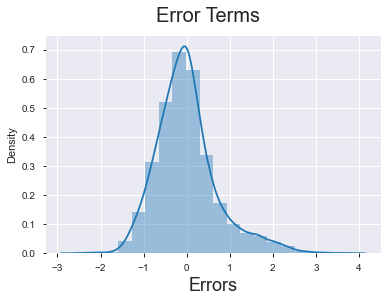

In [77]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Step 8: Making Predictions

In [78]:
num_vars=['Temp', 'Humidity','WindSpeed', 'Visibility', 'DewTemp','SolarRad','Rainfall','Snowfall','Count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [86]:
#y_test = df_test.pop('Count')
#X_test = df_test
X_train2.columns

Index(['const', 'Temp', 'Humidity', 'SolarRad', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Month_2', 'Month_5', 'Month_6', 'Month_10',
       'Year_2018', 'WeekDay_Sunday'],
      dtype='object')

In [90]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train2.columns]



KeyError: "['const'] not in index"

In [87]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

NameError: name 'X_test_new' is not defined

## Step 9: Model Evaluation

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

NameError: name 'y_test_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

NameError: name 'y_test_pred' is not defined

## **Assumptions of Linear Regression:**

* The error terms are normally distributed.
* The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
* The predicted values have linear relationship with the actual values.****